<a href="https://colab.research.google.com/github/Laeti-dev/P7-Sentiments_analysis/blob/master/P7_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the provided CSV data containing tweets, extract key insights, clean the data, handle null values, train a simple regression model for sentiment analysis (0-1), and analyze the model results to draw further insights.

## Load data

### Subtask:
Load the tweets data from the CSV file into a pandas DataFrame.


**Reasoning**:
Import the pandas library, load the data from the CSV file into a DataFrame, and display the first few rows and the info to inspect the data.

**About this file**:
This is the sentiment140 dataset.
It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 2 = neutral, 4 = positive) and they can be used to detect sentiment .
It contains the following 6 fields:

- *target*: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
- *ids*: The id of the tweet ( 2087)
- *date*: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
- *flag*: The query (lyx). If there is no query, then this value is NO_QUERY.
- *user*: the user that tweeted (robotickilldozr)
- *text*: the text of the tweet (Lyx is cool)



In [1]:
import pandas as pd

path = '/content/drive/MyDrive/OC/Projets/P7/data/training.1600000.processed.noemoticon.csv'
# Load the data from the CSV file into a pandas DataFrame
df = pd.read_csv(path,
                  header=None,
                  names=["target", "ids", "date", "flag", "user", "text"],
                  usecols=["target", "ids", "date", "user", "text"],  # remove flag column
                  parse_dates=["date"],
                  encoding="utf-8",
                  encoding_errors="replace",)

# Display the first few rows of the DataFrame and its info
display(df.head())
display(df.info())

/tmp/ipython-input-1-1691829743.py:5: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df = pd.read_csv(path,


,target,ids,date,user,text
0,0,1467810369,2009-04-06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all...."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   target  1600000 non-null  int64         
 1   ids     1600000 non-null  int64         
 2   date    1600000 non-null  datetime64[ns]
 3   user    1600000 non-null  object        
 4   text    1600000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 61.0+ MB


None

The data set has a the shape (1600000,5) without any obvious missing values

In [3]:
# Display columns and their data types
print(df.columns)
print(df.dtypes)

Index(['target', 'ids', 'date', 'user', 'text'], dtype='object')
target             int64
ids                int64
date      datetime64[ns]
user              object
text              object
dtype: object


## Clean dates

In [4]:
# split the date column into year, month and day columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour

df.drop(columns=['date'], inplace=True)
display(df.head())

,target,ids,user,text,year,month,day,hour
0,0,1467810369,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009,4,6,22
1,0,1467810672,scotthamilton,is upset that he can't update his Facebook by ...,2009,4,6,22
2,0,1467810917,mattycus,@Kenichan I dived many times for the ball. Man...,2009,4,6,22
3,0,1467811184,ElleCTF,my whole body feels itchy and like its on fire,2009,4,6,22
4,0,1467811193,Karoli,"@nationwideclass no, it's not behaving at all....",2009,4,6,22


## Uniqueness

In [5]:
# prompt: Check for duplicates using ids, user

# check for duplicate ids
print(f"Number of unique ids: {df['ids'].nunique()}")
# There are no duplicate ids, the ids are unique for each tweet.
# check for duplicate users
print(f"Number of unique users: {df['user'].nunique()}")
# There are 659,752 unique users, which means many users have tweeted more than once.
# check for duplicate tweets based on user and text
duplicate_tweets = df.duplicated(subset=['user', 'text']).sum()
print(f"Number of duplicate tweets (user and text): {duplicate_tweets}")
# There are 2473 duplicate tweets based on user and text, these should be removed.
df.drop_duplicates(subset=['user', 'text'], inplace=True)
print(f"Shape of DataFrame after removing duplicates: {df.shape}")
# Display the first few rows of the DataFrame and its info
display(df.head())
display(df.info())
# After removing duplicate tweets based on user and text, the DataFrame shape is (1597527, 8) and there are still no obvious missing values.
# Display columns and their data types
print(df.columns)
df.dtypes

Number of unique ids: 1598315
Number of unique users: 659775
Number of duplicate tweets (user and text): 5255
Shape of DataFrame after removing duplicates: (1594745, 8)


,target,ids,user,text,year,month,day,hour
0,0,1467810369,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009,4,6,22
1,0,1467810672,scotthamilton,is upset that he can't update his Facebook by ...,2009,4,6,22
2,0,1467810917,mattycus,@Kenichan I dived many times for the ball. Man...,2009,4,6,22
3,0,1467811184,ElleCTF,my whole body feels itchy and like its on fire,2009,4,6,22
4,0,1467811193,Karoli,"@nationwideclass no, it's not behaving at all....",2009,4,6,22


<class 'pandas.core.frame.DataFrame'>
Index: 1594745 entries, 0 to 1599999
Data columns (total 8 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1594745 non-null  int64 
 1   ids     1594745 non-null  int64 
 2   user    1594745 non-null  object
 3   text    1594745 non-null  object
 4   year    1594745 non-null  int32 
 5   month   1594745 non-null  int32 
 6   day     1594745 non-null  int32 
 7   hour    1594745 non-null  int32 
dtypes: int32(4), int64(2), object(2)
memory usage: 85.2+ MB


None

Index(['target', 'ids', 'user', 'text', 'year', 'month', 'day', 'hour'], dtype='object')


,0
target,int64
ids,int64
user,object
text,object
year,int32
month,int32
day,int32
hour,int32


## Explore data

### Subtask:

Get the number of users

In [6]:
df['user'].nunique()

659775

A user can post several tweets

### Subtask:

Get the number of tweets for each user

In [7]:
user_tweet_counts = df['user'].value_counts()

# Sort the counts in descending order and get the ranking
user_tweet_ranking = user_tweet_counts.sort_values(ascending=False)

# Display the top 10 users with the most tweets
print("Ranking of users by number of tweets (top 10):")
print(user_tweet_ranking.head(10))

Ranking of users by number of tweets (top 10):
user
lost_dog           549
webwoke            341
SallytheShizzle    281
VioletsCRUK        279
mcraddictal        274
tsarnick           248
what_bugs_u        246
Karen230683        238
DarkPiano          235
SongoftheOss       227
Name: count, dtype: int64


In [8]:
user_tweet_counts.describe()

,count
count,659775.000000
mean,2.417104
std,4.663490
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,549.000000


### Subtask:

Check for duplicates

In [20]:
df['text_lower'] = df['text'].str.lower()
duplicate_tweets = df.duplicated(subset=['text_lower'], keep=False)
print(f"Number of duplicate tweets : {duplicate_tweets.sum()}")

Number of duplicate tweets : 23475


### Subtask:

Is there duplicates with different target number ?

In [26]:
# Filter for rows that have duplicate text (case-insensitive)
duplicate_text_df = df[df.duplicated(subset=['text_lower'], keep=False)]
# Group by the lowercased text and check the number of unique target values for each group
duplicates_with_different_targets = duplicate_text_df.groupby('text_lower')['target'].nunique()
# Filter for groups where the number of unique targets is greater than 1
conflicting_duplicates = duplicates_with_different_targets[duplicates_with_different_targets > 1]
# Print the number of duplicate tweets with conflicting target values
print(f"Number of duplicate tweets with different target values: {conflicting_duplicates.shape[0]}")
# Display the text of some of these conflicting duplicate tweets and their targets
if not conflicting_duplicates.empty:
  print("\nExamples of conflicting duplicate tweets:")
  # Get the text of the first few conflicting tweets
  example_texts = conflicting_duplicates.head(5).index.tolist()
  # Filter the original DataFrame to show these examples and their targets
  example_df = duplicate_text_df[duplicate_text_df['text_lower'].isin(example_texts)].sort_values(by='text_lower')
  display(example_df[['text', 'target']])

Number of duplicate tweets with different target values: 648

Examples of conflicting duplicate tweets:


,text,target
37082,goodnight,0
328313,goodnight,0
642501,goodnight,0
1514585,goodnight,4
862515,goodnight,4
995820,goodnight,4
1387442,goodnight,4
1268996,goodnight,4
217905,i love you,0
507399,I love you,0


In [27]:
# Identify the rows that have duplicate text with different target values
conflicting_duplicate_rows = duplicate_text_df[duplicate_text_df['text_lower'].isin(conflicting_duplicates.index)]

# Get the indices of these conflicting rows
conflicting_indices = conflicting_duplicate_rows.index

# Drop these conflicting rows from the DataFrame
df.drop(conflicting_indices, inplace=True)

print(f"Shape of DataFrame after dropping conflicting duplicates: {df.shape}")
display(df.head())
display(df.info())

Shape of DataFrame after dropping conflicting duplicates: (1589807, 11)


,target,ids,user,text,year,month,day,hour,cleaned_text,sentiment_scaled,text_lower
0,0,1467810369,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009,4,6,22,a thats a bummer you shoulda got david carr of...,0,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,1467810672,scotthamilton,is upset that he can't update his Facebook by ...,2009,4,6,22,is upset that he cant update his facebook by t...,0,is upset that he can't update his facebook by ...
2,0,1467810917,mattycus,@Kenichan I dived many times for the ball. Man...,2009,4,6,22,i dived many times for the ball managed to sav...,0,@kenichan i dived many times for the ball. man...
3,0,1467811184,ElleCTF,my whole body feels itchy and like its on fire,2009,4,6,22,my whole body feels itchy and like its on fire,0,my whole body feels itchy and like its on fire
4,0,1467811193,Karoli,"@nationwideclass no, it's not behaving at all....",2009,4,6,22,no its not behaving at all im mad why am i her...,0,"@nationwideclass no, it's not behaving at all...."


<class 'pandas.core.frame.DataFrame'>
Index: 1589807 entries, 0 to 1599999
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   target            1589807 non-null  int64 
 1   ids               1589807 non-null  int64 
 2   user              1589807 non-null  object
 3   text              1589807 non-null  object
 4   year              1589807 non-null  int32 
 5   month             1589807 non-null  int32 
 6   day               1589807 non-null  int32 
 7   hour              1589807 non-null  int32 
 8   cleaned_text      1589807 non-null  object
 9   sentiment_scaled  1589807 non-null  int64 
 10  text_lower        1589807 non-null  object
dtypes: int32(4), int64(3), object(4)
memory usage: 121.3+ MB


None

## Clean Text Data

### Subtask:
Preprocess the tweet text by removing noise such as special characters, URLs, mentions, and hashtags. Convert text to lowercase.

In [28]:
import re

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions (@...)
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags (#...) - keep the text
    text = re.sub(r'#', '', text)
    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

# Display the original and cleaned text for comparison
display(df[['text', 'cleaned_text']].head())

,text,cleaned_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",a thats a bummer you shoulda got david carr of...
1,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...


## Extract Key Insights

### Subtask:
Analyze the distribution of sentiment (target) in the dataset.

Sentiment Distribution:
 target
0    795418
4    794389
Name: count, dtype: int64


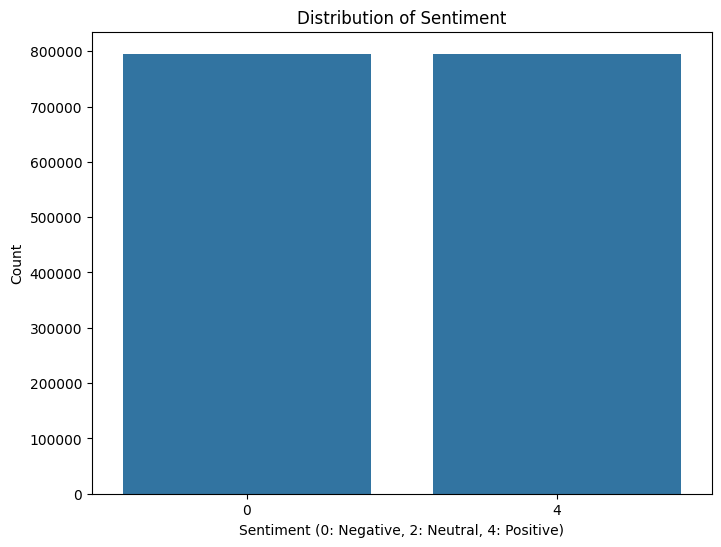

In [29]:
# Analyze the distribution of the target variable
sentiment_distribution = df['target'].value_counts()
print("Sentiment Distribution:\n", sentiment_distribution)

# Optionally, visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment (0: Negative, 2: Neutral, 4: Positive)')
plt.ylabel('Count')
plt.show()

The target values are balanced : as many Negative as Positive comments.

In [30]:
# Convert the target variable to a 0-1 scale (0: Negative, 1: Positive)
# Assuming 0 is negative and 4 is positive, we can map 0 to 0 and 4 to 1.
df['sentiment_scaled'] = df['target'].replace({0: 0, 4: 1})

### Subtask:

Vizualize data
#### Target distribution through dates

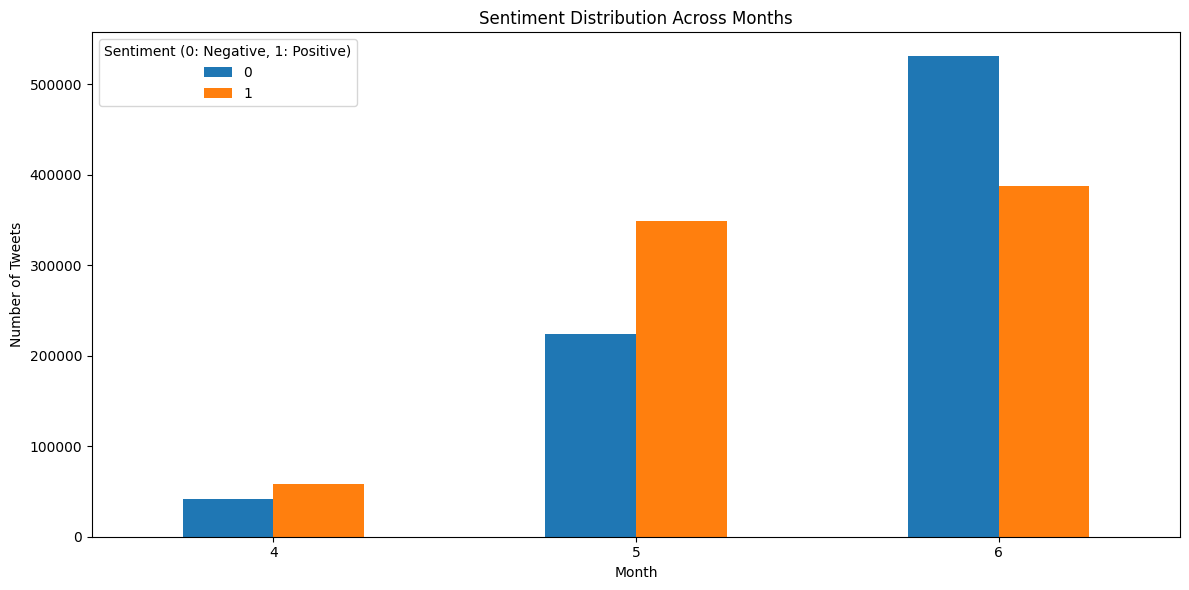

In [33]:
# Group by month and target, then count the occurrences
target_by_month = df.groupby(['month', 'sentiment_scaled']).size().unstack(fill_value=0)

# Plot the distribution of sentiments over the months
plt.figure(figsize=(12, 6))
target_by_month.plot(kind='bar', stacked=False, ax=plt.gca())
plt.title('Sentiment Distribution Across Months')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.legend(title='Sentiment (0: Negative, 1: Positive)')
plt.tight_layout()
plt.show()

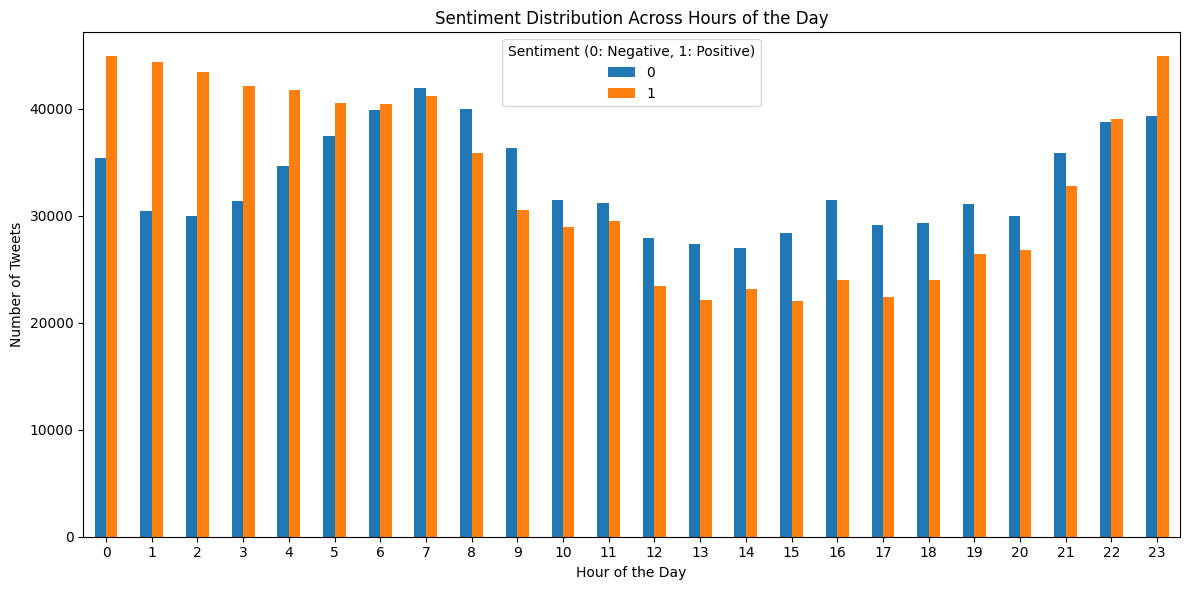

In [34]:
# Group by hour and target, then count the occurrences
target_by_hour = df.groupby(['hour', 'sentiment_scaled']).size().unstack(fill_value=0)

# Plot the distribution of sentiments over the hours
plt.figure(figsize=(12, 6))
target_by_hour.plot(kind='bar', stacked=False, ax=plt.gca())
plt.title('Sentiment Distribution Across Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.legend(title='Sentiment (0: Negative, 1: Positive)')
plt.tight_layout()
plt.show()

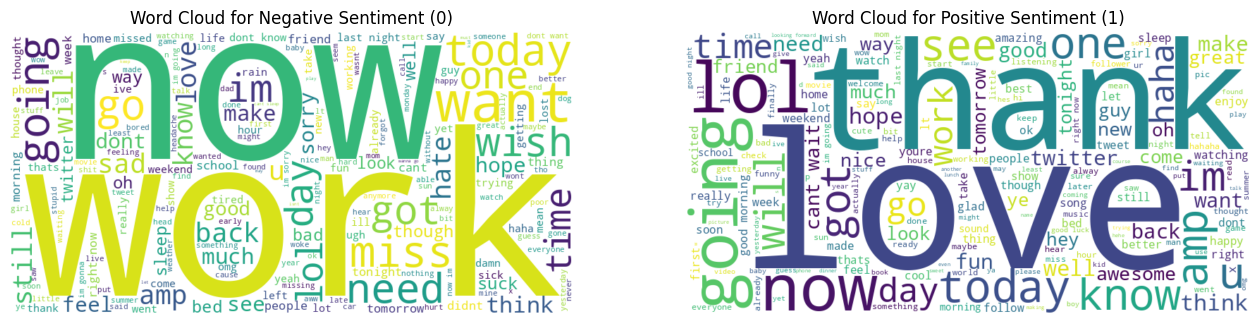

In [35]:
!pip install wordcloud

from wordcloud import WordCloud

# Separate text based on sentiment
negative_text = " ".join(df[df['sentiment_scaled'] == 0]['cleaned_text'].dropna())
positive_text = " ".join(df[df['sentiment_scaled'] == 1]['cleaned_text'].dropna())

# Generate word clouds
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Plot word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment (0)')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment (1)')

plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


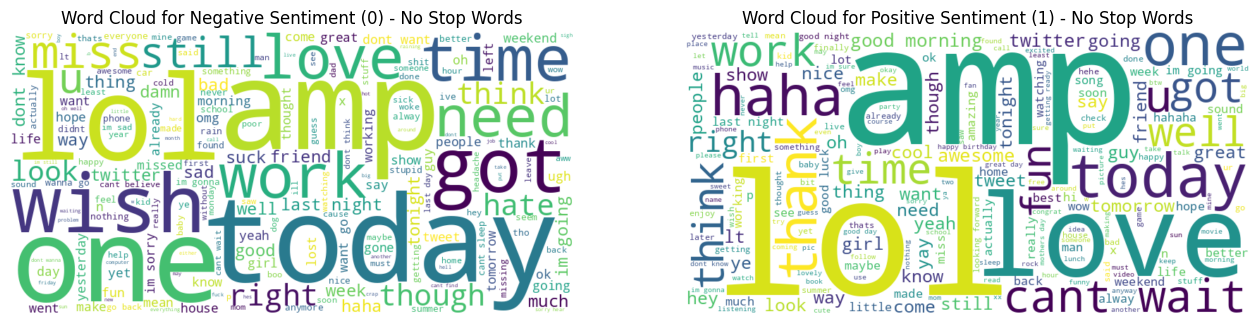

In [36]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Get English stop words
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  if isinstance(text, str):
    return " ".join([word for word in str(text).split() if word not in stop_words])
  return ""

# Apply the remove_stopwords function to the cleaned text
df['text_without_stopwords'] = df['cleaned_text'].apply(remove_stopwords)

# Separate text based on sentiment after removing stop words
negative_text_no_stopwords = " ".join(df[df['sentiment_scaled'] == 0]['text_without_stopwords'].dropna())
positive_text_no_stopwords = " ".join(df[df['sentiment_scaled'] == 1]['text_without_stopwords'].dropna())

# Generate word clouds with text without stop words
wordcloud_neg_no_stopwords = WordCloud(width=800, height=400, background_color='white').generate(negative_text_no_stopwords)
wordcloud_pos_no_stopwords = WordCloud(width=800, height=400, background_color='white').generate(positive_text_no_stopwords)

# Plot word clouds without stop words
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_neg_no_stopwords, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment (0) - No Stop Words')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_pos_no_stopwords, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment (1) - No Stop Words')

plt.show()


# Save dataframe as a pickle file

In [38]:
import pickle

# Define the path to save the pickle file
pickle_path = '/content/drive/MyDrive/OC/Projets/P7/data/processed_tweets_df.pkl'

# Save the DataFrame as a pickle file
with open(pickle_path, 'wb') as f:
    pickle.dump(df, f)

print(f"DataFrame saved to {pickle_path}")

DataFrame saved to /content/drive/MyDrive/OC/Projets/P7/data/processed_tweets_df.pkl
